In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Лабораторная работа № 1
В результате опыта была получена выборочная совокупность.
Задание:
1. ~~Составить вариационный ряд.~~
2. ~~Построить интервальный статистический ряд.~~
3. ~~По сгруппированным данным построить полигон относительных частот, гистограмму относительных частот, график эмпирической функции распределения.~~
4. Найти числовые характеристики выборки: выборочное среднее, исправленную выборочную дисперсию, моду, медиану, эксцесс, асимметрию.
5. По виду гистограммы и эмпирической функции распределения выборки выдвинуть гипотезу о распределении генеральной совокупности.
6. Найти оценки параметров предполагаемого распределения генеральной совокупности.
7. Построить на чертеже гистограммы и эмпирической функции её теоретические аналоги f(x) и F(x).
8. Проверить выполнение правила «трех сигма».
9. Применить критерий согласия Пирсона принять или опровергнуть выдвинутую гипотезу о распределении генеральной совокупности.
10. Найти доверительные интервалы для генеральной средней и генерального среднеквадратического отклонения по уровню надежности γ = 0,95.

In [96]:
data = np.array([
    305, 316, 338, 316, 323, 301, 315, 
    313, 309, 311, 312, 304, 330, 313, 
    310, 321, 310, 302, 312, 317, 328, 
    316, 305, 325, 344, 320, 319, 320, 
    323, 322, 297, 324, 306, 301, 303, 
    295, 335, 311, 314, 316, 316, 310, 
    316, 300, 323, 324, 331, 320, 304
])

In [97]:
n = data.shape[0]

## Вариационный ряд

In [98]:
var_row = np.array(sorted(data))
print('Вариационный ряд:', *var_row)

Вариационный ряд: 295 297 300 301 301 302 303 304 304 305 305 306 309 310 310 310 311 311 312 312 313 313 314 315 316 316 316 316 316 316 317 319 320 320 320 321 322 323 323 323 324 324 325 328 330 331 335 338 344


## Построение интервального статистического ряда

In [99]:
x_min = np.min(data)
x_max = np.max(data)
print(f"1) Минимальное значение: {x_min}\n2) Максимальное значение: {x_max}\n ")

1) Минимальное значение: 295
2) Максимальное значение: 344
 


In [100]:
k = round(1 + 3.322 * np.log10(n)) # число интервалов
h = round((x_max - x_min) / k) + 1 # размер интервала
x_0 = x_min - h/2
intervals = np.array([np.array([x_0 + i * h, x_0 + (i + 1) * h]) for i in range(k)])
intervals

array([[291., 299.],
       [299., 307.],
       [307., 315.],
       [315., 323.],
       [323., 331.],
       [331., 339.],
       [339., 347.]])

In [101]:
freq_row = np.array([var_row[(var_row >= min) & (var_row < max)].shape[0] for min, max in intervals], dtype=np.int8)
emp_freq_row = freq_row / data.shape[0]
p_hist = emp_freq_row / h

In [102]:
columns = [f"[{int(l)}, {int(r)})" for l, r in intervals]

In [103]:
df = pd.DataFrame(
    np.vstack((np.mean(intervals, axis=1), freq_row, emp_freq_row, p_hist)), 
    columns=columns, dtype=pd.Int8Dtype
) 
df.index = ["Среднее по интервалу", "Частота", "Эмпирическая частота", "Высота гистограммы"]

In [104]:
df

,"[291, 299)","[299, 307)","[307, 315)","[315, 323)","[323, 331)","[331, 339)","[339, 347)"
Среднее по интервалу,295.0,303.0,311.0,319.0,327.0,335.0,343.0
Частота,2.0,10.0,11.0,14.0,8.0,3.0,1.0
Эмпирическая частота,0.040816,0.204082,0.22449,0.285714,0.163265,0.061224,0.020408
Высота гистограммы,0.005102,0.02551,0.028061,0.035714,0.020408,0.007653,0.002551


## Построение графиков

In [216]:
mean_row = np.array(df.loc['Среднее по интервалу'], dtype=np.int_)
right_row = intervals[:, -1].astype(np.int_)
beauty_columns = list(map(lambda x: '\n'.join(x), zip(map(lambda x: str(x), mean_row), columns)))
beauty_columns_right = list(map(lambda x: '\n'.join(x), zip(map(lambda x: str(x), right_row), columns)))
p_sum = [0, i:=0] + (f:=[i := i + p for p in np.array(df.loc['Эмпирическая частота'], dtype=np.float_)]) + [f[-1]]

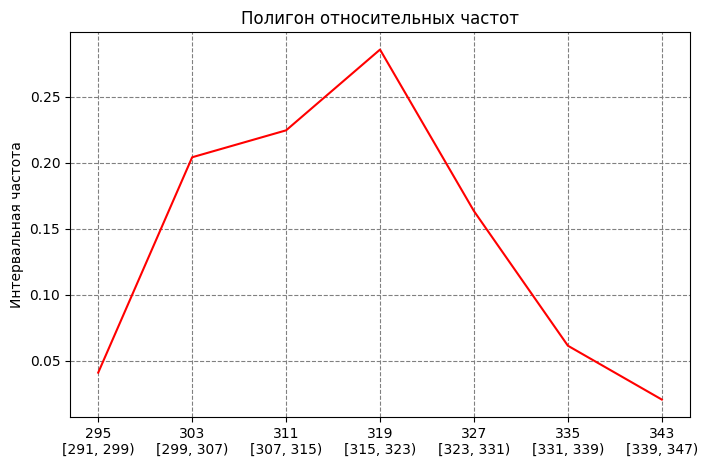

In [241]:
plt.figure(figsize=(8,5))
plt.title('Полигон относительных частот')
plt.rc('axes', axisbelow=True)
plt.plot(mean_row, emp_freq_row, color='red')
plt.xticks(mean_row, beauty_columns);
plt.grid(color='gray', linestyle='dashed')
plt.ylabel('Интервальная частота');

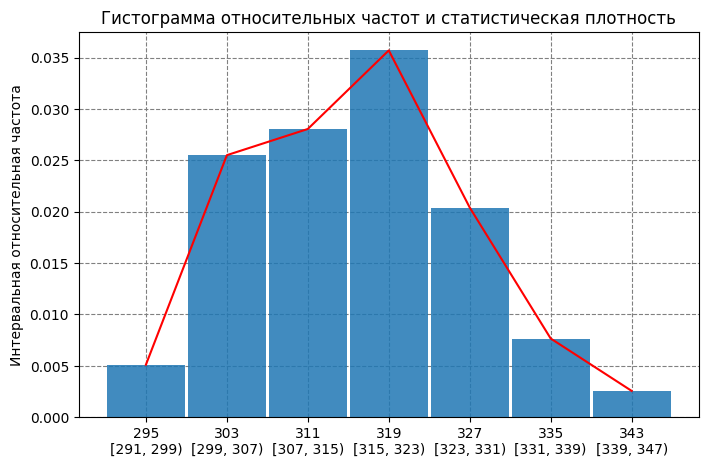

In [240]:
plt.figure(figsize=(8,5))
plt.title('Гистограмма относительных частот и статистическая плотность')
plt.rc('axes', axisbelow=True)
plt.bar(mean_row, p_hist, width=h - 0.3, alpha=0.85)
plt.grid(color='gray', linestyle='dashed')
plt.plot(mean_row, p_hist, color='red')
plt.xticks(mean_row, beauty_columns);
plt.ylabel('Интервальная относительная частота');

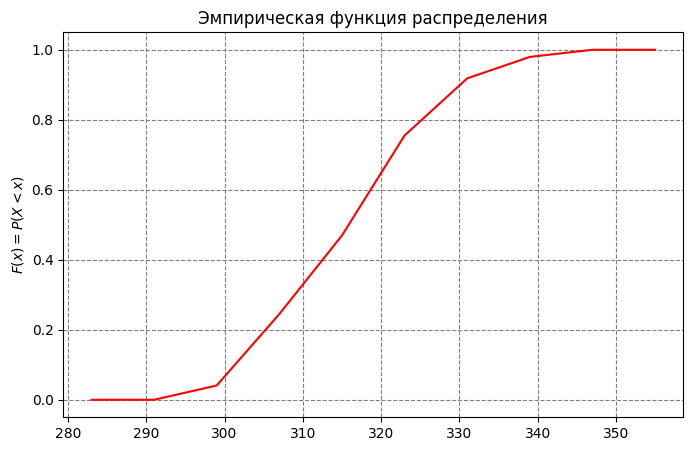

In [239]:
plt.figure(figsize=(8,5))
plt.title('Эмпирическая функция распределения')
plt.rc('axes', axisbelow=True)
plt.grid(color='gray', linestyle='dashed')
plt.ylabel('$F(x) = P(X < x)$')
plt.plot(np.hstack((intervals[0, 0] - h, intervals[0][0], right_row, intervals[-1, -1] + h)), p_sum, color='red');

## Числовые характеристики выборки

In [257]:
sample_mean = np.sum(mean_row * emp_freq_row)
corrected_sample_variance = np.sum(emp_freq_row * (mean_row - sample_mean) ** 2)

print(f"""Выборочные характеристики: 
1) Выборочное среднее: {sample_mean};
2) Исправленная выборочная дисперсия: {corrected_sample_variance}
""")

Выборочные характеристики: 
1) Выборочное среднее: 315.734693877551;
2) Исправленная выборочная дисперсия: 117.33777592669722

